
<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

### Interactive Workflow of Principal Component Analysis
    
#### The University of Texas at Austin, PGE 2020 SURI, Undergraduation Research Internship,
    
 #### Arham Junaid, Undergraduate Student, The University of Texas at Austin,
 
 #### [LinkedIn](https://www.linkedin.com/in/arhamjunaid)

 #### Michael Pyrcz, Associate Professor, University of Texas at Austin,
    
 ##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy),

#### Introduction

Hello and welcome to my workflow relating to Principal Component Analysis. I built out this well-documented workflow with Prof. Pyrcz as part of a SURI undergraduate research project at The University of Texas at Austin.

I am Arham Junaid, currently a student doing his undergraduate studies relating to the Energy industry while exploring various Machine Learning methodologies. Principal Component Analysis is an example of inferential machine learning, essentially a method in which your data can be analyzed for dimensional reduction, relationships between variables and making predictions based on the relationships determined. 

For more check out Prof. Pyrcz's YouTube channel [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig). For the walkthrough video of this workflow go here [walkthrough](TBD). Here's some basic concepts on Principal Component Analysis.

#### Principal Component Analysis

Principal Component Analysis one of a variety of methods for dimensional reduction:

Dimensional reduction transforms the data to a lower dimension

* Given features, $𝑋_1,\dots,𝑋_𝑚$  we would require ${m \choose 2}=\frac{𝑚 \cdot (𝑚−1)}{2}$ scatter plots to visualize just the two-dimensional scatter plots.

* Once we have 4 or more variables understanding our data gets very hard.

* Recall the curse of dimensionality, impact inference, modeling and visualization. 

One solution, is to find a good lower dimensional, $𝑝$,  representation of the original dimensions $𝑚$

Benefits of Working in a Reduced Dimensional Representation:

1. Data storage / Computational Time

2. Easier visualization

3. Also takes care of multicollinearity 

#### Orthogonal Transformation 

Convert a set of observations into a set of linearly uncorrelated variables known as principal components

* The number of principal components ($k$) available are min⁡($𝑛−1,𝑚$) 

* Limited by the variables/features, $𝑚$, and the number of data

Components are ordered

* First component describes the larges possible variance / accounts for as much variability as possible
* Next component describes the largest possible remaining variance 
* Up to the maximum number of principal components

Eigen Values / Eigen Vectors

* The Eigen values are the variance explained for each component. 
* The Eigen vectors of the data covariance matrix are the principal components and the Eigen  
* Out of scope – just making the linkage

#### Objective
In this workflow, we will explore 4 basic aspects of PCA. These include:

  - Orthogonal rotation and the incorporation of eigen math

  - Forward and backward transformations

  - Variance Explained

  - Dimensionality Reduction

PCA allows is to find good relationships within lower dimensions to allow for greater representation of a multivariate data set and has benefits including ease of visualization, multicollinearity and a reduction in data storage and computational analysis.

It is hoped that this interactive version of PCA will provide greater understanding with regards to the benefit of the method in general application.

#### Getting Started
Here are the steps to get setup in Python with the GeostatsPy package:
1.	Install Anaconda 3 on your machine (https://www.anaconda.com/download/).
2.	From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal.
3.	In the terminal type: pip install geostatspy.
4.	Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality.

You will need to copy the data file to your working directory. They are available here:
   - Tabular data - unconv_MV_v2.csv at https://git.io/fjmBH.

#### Install Packages

For this interactive workflow to work, we need to install several packages relating to display features, widgets and data analysis interpretation.

In [1]:
import os                                                 # to set current working directory 
from sklearn.decomposition import PCA                     # PCA program from scikit learn (package for machine learning)
from sklearn.preprocessing import StandardScaler          # standardize variables to mean of 0.0 and variance of 1.0
import pandas as pd                                       # DataFrames and plotting
import pandas.plotting as pd_plot                         # matrix scatter plots
import numpy as np                                        # arrays and matrix math
import matplotlib.pyplot as plt                           # plotting
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interactive, interact              # widgets and interactivity
from ipywidgets import widgets                            
from ipywidgets import Layout
from ipywidgets import Label
import matplotlib.transforms as transforms
import math
from ipywidgets import VBox, HBox
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
cmap = plt.cm.inferno

#### The Data Set
Next, let’s go ahead and load the data set we are going to be working with. We’re able to view the variables relating to production.
This dataset has variables from 1,000 unconventional wells including:
 -	well average porosity
 - 	log transform of permeability (to linearize the relationships with other variables)
 -	accoustic impedance (kg/m^3 x m/s x 10^6)
 -	brittness ratio (%)
 -	total organic carbon (%)
 -	vitrinite reflectance (%)
 -	initial production 90 day average (MCFPD).
 -	scaled production
 
First copy the "unconv_MV_v2.csv" comma delimited file from https://github.com/GeostatsGuy/GeoDataSets to your working directory, then run this command to read the file into a DataFrame object (part of Pandas package).

In [2]:
import os
#os.chdir(r'C:\PGE383')
#df=pd.read_csv("unconv_MV_v2.csv")
df=pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/unconv_MV_v2.csv")
df.head()

,Sample,Por,LogPerm,AI,Brittle,TOC,VR,Production,Prod2Scaled
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958,1897.657798
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778,2745.732996
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583,5835.130524
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629,2132.237219
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919,6282.254735


We are also able to view some basic summary statistics relating to our variables and transpose the data set to make it easier for us to work with.

In [3]:
df = df.iloc[:,1:9]                                  # copy all rows and columns 1 through 9, note 0 column is removed
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


We can go about ensuring the negative values are removed, namely for TOC and Brittleness, since those are not possible and we can set our data values into a single Data Frame.

In [4]:
num = df._get_numeric_data()                         # get the numerical values
num[num < 0] = 0                                     # truncate negative values to 0.0
df.describe().transpose()                            # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.857500,14.985000,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.130000,1.390000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.577500,3.010000,3.360000,4.70000
Brittle,1000.0,49.769980,14.944955,3.030000,39.722500,49.680000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.640000,0.995000,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.810000,2.000000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.369560,1976.487820,3023.594214,12568.64413
Prod2Scaled,1000.0,3237.154325,1507.552730,2.713535,2120.961071,2991.762748,4105.623405,12568.64413


In order to go about dimensionality reduction, a useful first step is to develop a correlation matrix. The higher the magnitude of correlation between your 2 variables, the more likely it is that your principal component scores will be able to account for a greater variance of your data.

* PCA assumes that there is linear correlation between features, this does exist in our dataset

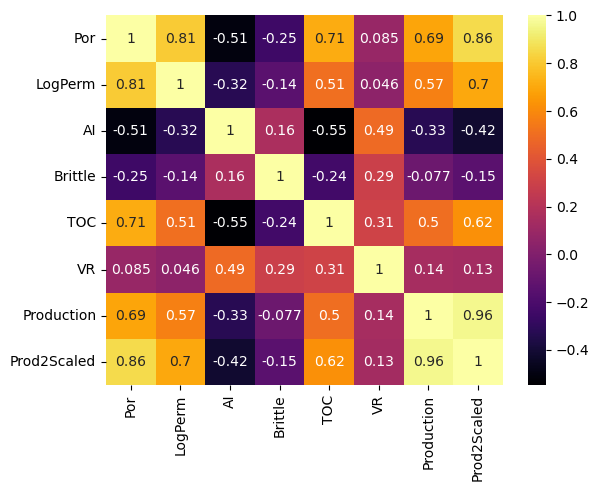

In [5]:
_=sns.heatmap(df.corr(),annot=True,cmap=cmap)

From the correlation matrix above, can observe a mix of bivariate data, and linear correlation magnitudes and for additional visualization, we can take a look at the matrix scatter plot as we look to narrow down to 2 variables to allow for analysis of our data.

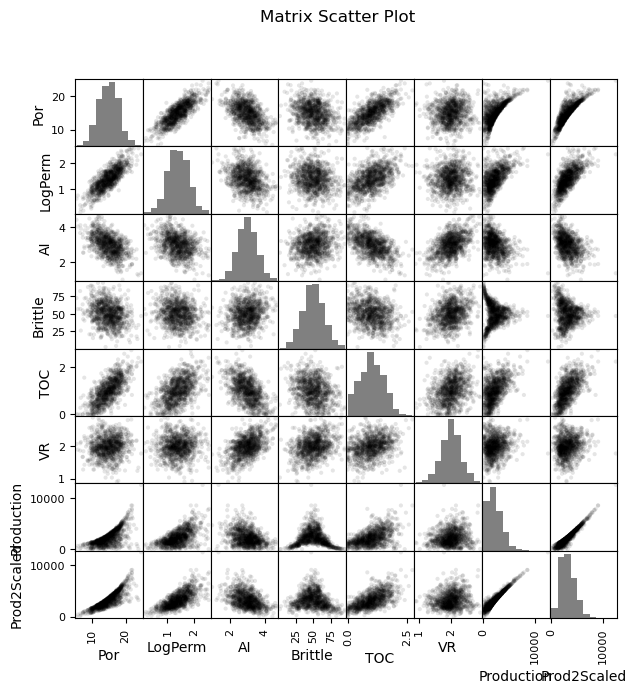

In [6]:
pd_plot.scatter_matrix(df, alpha = 0.1,              # pandas matrix scatter plot
    figsize=(7, 7),color = 'black', hist_kwds={'color':['grey']})
plt.suptitle("Matrix Scatter Plot")
plt.show()

#### Interactive Exercise #1: Orthogonal Rotation


For our first example, let’s explore the power of orthogonal rotation. 
* Eigen values and eigen vectors are based on the idea of the rotation of your axis. For our example, 2 variables, Por and TOC, with a relatively high correlation coefficient, were chosen to explore this idea further. 
* For reduced computational load, only 100 values have been selected but you’re welcome to incorporate more of the data by copying and changing the code. 
* For principle component scores to be calculated, the data first needs to be standardized. 

We can have a go at visualizing how the data points alter as the angle of rotation varies and how much of the variance is influenced by rotation coordinate 1 and rotational coordinate 2.

In [7]:
my_data_por_perm = df[["Por","TOC"]]                # extract just por and TOC, 100 samples
my_data_por_perm =my_data_por_perm.iloc[0:100]
features = ['Por','TOC']
x = my_data_por_perm.loc[:,features].values
s = StandardScaler()
s.fit(x)
x = s.transform(x)                                  # standardize the data features to mean = 0, var = 1.0

Now that we have our data standardized, we can take a look at a scatter plot of the 2 variables.

Text(0, 0.5, 'Standardized TOC')

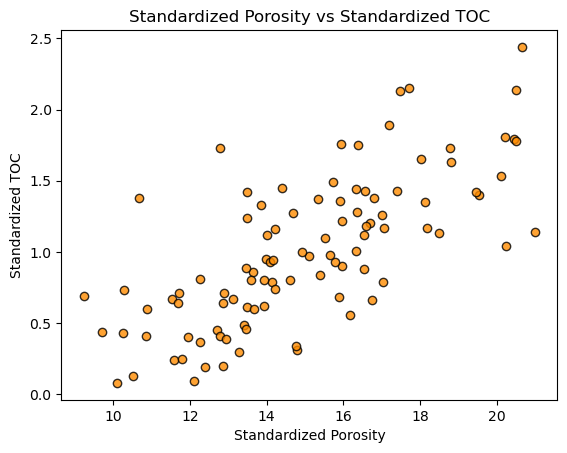

In [8]:
figure, a = plt.subplots()
a.scatter(my_data_por_perm["Por"],my_data_por_perm["TOC"],s=None, c="darkorange", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=1.0, edgecolors="black")    
a.set_title('Standardized Porosity vs Standardized TOC'); 
a.set_xlabel("Standardized Porosity")
a.set_ylabel("Standardized TOC")

From the plot, there seems to be a seemingly linear trend.

We can now visualize how the data is rotated in order to understand the proportion of the variance for each rotated coordinate. The rotational coordinates are determined by simple trigonometric functions, sine and cosine to determine their new location.

In [9]:
global xdata                                        #create global values to allow for orthoganal rotation and visualization
global ydata
def pc_slider(Angle):
    global xdata
    global ydata
    fig15, ((ax15,ax16)) = plt.subplots(1, 2,figsize=(15,6), constrained_layout=True)
    fig15.subplots_adjust(wspace=.5,hspace = .5)
    
    
    base = plt.gca().transData
    #print(base)
    rot = transforms.Affine2D().rotate_deg(int(Angle))
    line=ax16.plot(x[:,0],x[:,1], 'o', transform= rot + base, c = 'black', alpha = 0.3)
    
    xdata=x[:,0]*math.cos(math.radians(int(Angle)))-x[:,1]*math.sin(math.radians(int(Angle)))
    ydata=x[:,1]*math.cos(math.radians(int(Angle)))+x[:,0]*math.sin(math.radians(int(Angle)))
    
    eigen = np.zeros([2,2])
    eigen[0,0] = math.cos(Angle*math.pi/180.0)
    eigen[1,0] = math.sin(Angle*math.pi/180.0)
    eigen[0,1] = -1*math.sin(Angle*math.pi/180.0)
    eigen[1,1] = math.cos(Angle*math.pi/180.0)
    
    df2 = pd.DataFrame({'x':xdata, 'y':ydata})
    data = df2.values
    lists=[]
    
    ydataZeroed = np.zeros(len(ydata))

    ax16.plot(xdata, ydataZeroed,"or", c = 'red', alpha = 0.3)
    ax16.plot(ydataZeroed, ydata,"or", c= 'blue', alpha = 0.3)
    ax16.set_xlim(left=-3.5, right=3.5)
    ax16.set_ylim(bottom=-3.5, top=3.5)
    
    ax16.set_title("Arbitrary Data Projection");ax16.set_xlabel('Projected Feature 1'); ax16.set_ylabel('Projected Feature 2')
    labels = 'Feature 2 Variance', 'Feature 1 Variance'
    sizes = []
    
    print('Your Estimated Principal Component/Eigen Vector #1 = ' + str(eigen[:,0]))
    print('Your Estimated Principal Component/Eigen Vector #2 = ' + str(eigen[:,1]))
    
    sumOfVariance=df2.var()['x']+df2.var()['y']
    sizes.append(df2.var()['x']/sumOfVariance)
    sizes.append(df2.var()['y']/sumOfVariance)
    n = ax15.pie(sizes, autopct='%1.2f%%',colors = ['red','blue'],shadow=True,startangle=90)
    n[0][0].set_alpha(0.5); n[0][1].set_alpha(0.5)
    ax15.axis('equal')
    ax15.legend(sizes, labels=labels,loc='upper left')
#    plt.tight_layout()
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.1)
    plt.show()
    
x0 = widgets.Text(value='                                   Interactive Feature Projection - Orthogonal Rotation, Arham Junaid and Dr. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
x1 = widgets.IntSlider(min=0, max = 180, value = 0, description = 'Angle',orientation='horizontal')
uik2 = widgets.VBox([x0,x1],)
interactive_plot = widgets.interactive_output(pc_slider, {'Angle': x1})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Feature Projection with Arbitrary Rotation

#### Arham Junaid, SURI Student, Michael Pyrcz, Associate Professor, University of Texas at Austin 

Observed the partitioning of variance over 2 new features through orthogonal projection / rotation.

### The Inputs

* **Angle**: data rotation angle

In [10]:
display(uik2,interactive_plot)

Output()

We can now convert our rotated coordinates back in the data frame to do some analysis.

Now let's visualize the principal components in a more intuitive manner.

In [11]:
global xdata                                        #create global values to allow for orthoganal rotation and visualization
global ydata
def pc_slider(Angle):
    global xdata
    global ydata
    fig15, ((ax15,ax16)) = plt.subplots(1, 2,figsize=(15,6), constrained_layout=True)
    fig15.subplots_adjust(wspace=.5,hspace = .5)
    
    base = plt.gca().transData
    #print(base)
    rot = transforms.Affine2D().rotate_deg(int(Angle))
    #line=ax16.plot(x[:,0],x[:,1], 'o', transform= rot + base, c = 'black', alpha = 0.3)
    line=ax16.plot(x[:,0],x[:,1], 'o', c = 'black', alpha = 0.3)
    
    xdata=x[:,0]*math.cos(math.radians(int(Angle)))-x[:,1]*math.sin(math.radians(int(Angle)))
    ydata=x[:,1]*math.cos(math.radians(int(Angle)))+x[:,0]*math.sin(math.radians(int(Angle)))
    
    eigen = np.zeros([2,2])
    eigen[0,0] = math.cos(Angle*math.pi/180.0)
    eigen[1,0] = math.sin(Angle*math.pi/180.0)
    eigen[0,1] = -1*math.sin(Angle*math.pi/180.0)
    eigen[1,1] = math.cos(Angle*math.pi/180.0)
    
    df2 = pd.DataFrame({'x':xdata, 'y':ydata})
    data = df2.values
    lists=[]
    
    ydataZeroed = np.zeros(len(ydata))

    rotinv = transforms.Affine2D().rotate_deg(int(-Angle)) 
    ax16.plot(xdata, ydataZeroed,"or", c = 'red', alpha = 0.3,transform= rotinv + base)
    ax16.plot(ydataZeroed, ydata,"or", c= 'blue', alpha = 0.3,transform= rotinv + base)
    ax16.set_xlim(left=-3.5, right=3.5)
    ax16.set_ylim(bottom=-3.5, top=3.5)
    
    ax16.set_title("Data and Arbitrary Feature Projection Components");ax16.set_xlabel('Standardized Porosity'); ax16.set_ylabel('Standardized TOC')
    labels = 'Feature 2 Variance', 'Feature 1 Variance'
    sizes = []
    
#     print('Your Estimated Principal Component/Eigen Vector #1 = ' + str(eigen[:,0]))
#     print('Your Estimated Principal Component/Eigen Vector #2 = ' + str(eigen[:,1]))
    
    sumOfVariance=df2.var()['x']+df2.var()['y']
    sizes.append(df2.var()['x']/sumOfVariance)
    sizes.append(df2.var()['y']/sumOfVariance)
    n = ax15.pie(sizes, autopct='%1.2f%%',colors = ['red','blue'],shadow=True,startangle=90)
    n[0][0].set_alpha(0.5); n[0][1].set_alpha(0.5)
    ax15.axis('equal')
    ax15.legend(sizes, labels=labels,loc='upper left')
    ax15.set_title('Variance for Arbitrary Feature Projection Components')
#    plt.tight_layout()
    plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.0, wspace=0.1, hspace=0.1)
    plt.show()
    
x0 = widgets.Text(value='                                            Interactive Feature Projection - Orthogonal Rotation, Dr. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
x1 = widgets.IntSlider(min=0, max = 180, value = 0, description = 'Angle',orientation='horizontal',continuous_update=False)
uik2 = widgets.VBox([x0,x1],)
interactive_plot = widgets.interactive_output(pc_slider, {'Angle': x1})
interactive_plot.clear_output(wait = True)               # reduce flickering by delaying plot updating

### Interactive Feature Projection with Arbitrary Rotation

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

Observed the partitioning of variance over 2 new features through orthogonal projection / rotation.

### The Inputs

* **Angle**: data rotation angle

In [12]:
display(uik2,interactive_plot)

Output()

Below, we can see the calculation of the covariance matrix and the proportion of variance explained by each Principal Component Score as determined by PCA. 

In [13]:
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(x)
print(np.round(pca.components_,3))
print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,4))

[[ 0.707  0.707]
 [-0.707  0.707]]
Variance explained by PC1 and PC2 = [0.8596 0.1404]


At angle 0, the covariance tells us that both variables have the same amount of influence on the variance. This changes with the angle of rotation. 

The proportion of variance explained by the first principal component score is 85.96%. 

**Exercise:** Play around with the rotation above and see what angle provides the variance determined by PCA

#### Interative Workflow #2: Forward and Backward Transformations

Below you can choose an arbitrary value for a new data point, in blue. As you play around with where the new data point is placed, you notice that the data point can only go along the de-standardized line in graph 6. This is a key aspect of PCA relating to how the data is transformed based on the Principal Component scores calculated.

Here is a flowchart of the transformations which take place:

   ![alt text](flowChartFinal.png "Title")
   
   


First, the PCA code is written to calculate the location of data points in each of these state spaces.

In [14]:
mu = np.mean(x, axis=0)
sd = np.std(x, axis=0)
x_stand = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0

nComp = 1

n_components = 2                                                   # build principal component model with 2 components
pca = PCA(n_components=n_components)
pca.fit(x)

x_trans = pca.transform(x)                                         # calculate principal component scores

xtrans2 = x_trans.copy()
x_trans[:,1] = 0.0                                                 # zero / remove the 2nd principal component 

xtrans2[:,0] = 0

xhat = pca.inverse_transform(x_trans)                             # reverse the principal component scores to standardized values

xhat = np.dot(pca.inverse_transform(xhat)[:,:nComp], pca.components_[:nComp,:])
xhat = sd*xhat + mu                                                # remove the standardization

We can then plot the data points in scatter form in each of the state spaces.

In [19]:
 def pc_slider(X, Y):
    nComp = 1
    f, ((ax201,ax202, ax203), (ax204, ax205, ax206)) = plt.subplots(2, 3,figsize=(13,8))
    f.subplots_adjust(wspace=0.5,hspace = 0.3)

    ax201.scatter(my_data_por_perm['Por'],my_data_por_perm['TOC'],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")    
    ax201.set_title('1. Porosity vs. TOC'); 
    ax201.set_xlabel("Porosity"); ax201.set_ylabel("TOC")
    ax201.set_xlim([5,25]), ax201.set_ylim([0.0,2.5])
    features = ['Por','TOC']
    
    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    stscalar = StandardScaler() 
    x_stand = stscalar.fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0
    temp = np.array([float(X), float(Y)])
    temp=temp.reshape(-1, 2)
    temp=s.transform(temp)
    

    ax202.scatter(x_stand[:,0],x_stand[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax202.set_title('2. Standardized Por vs TOC'); ax202.set_xlabel('Standardized Porosity'); ax202.set_ylabel('Standardized TOC')
    ax202.set_xlim([-3,3]), ax202.set_ylim([-3,3])

    n_components = 2                                                # build principal component model with 2 components
    pca = PCA(n_components=n_components)
    pca.fit(x)

    x_trans = pca.transform(x)                                   # calculate principal component scores
    ax203.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax203.set_title('3. Principal Component Scores'); ax203.set_xlabel('PC1'); ax203.set_ylabel('PC2')
    ax203.set_xlim([-3,3]), ax203.set_ylim([-3,3])
    
    x_trans[:,1] = 0.0                                              # zero / remove the 2nd principal component 

    ax204.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax204.set_title('4. Only 1st Principal Component Scores'); ax204.set_xlabel('PC1'); ax204.set_ylabel('PC2')
    ax204.set_xlim([-3,3]), ax204.set_ylim([-3,3])
    
    xhat = pca.inverse_transform(x_trans)                           # reverse the principal component scores to standardized values
    ax205.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax205.set_title('5. Reverse PCA'); 
    ax205.set_xlabel('Standardized POR'); ax205.set_ylabel('Standardized TOC')
    ax205.set_xlim([-3,3]), ax205.set_ylim([-3,3])                      

    xhat = s.inverse_transform(xhat)
    ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax206.set_title('6. De-standardized Reverse PCA');
    ax206.set_xlabel('Porosity'); ax206.set_ylabel('TOC')
    ax206.set_xlim([5,25]), ax206.set_ylim([0.0,2.5])
    
    ax201.plot(float(X),float(Y),marker = "+", c = 'black',markersize = 20,markeredgewidth = 3,alpha = 0.8)
    ax202.plot(temp[:,0], temp[:,1],marker = "+", c = 'black',markersize = 20,markeredgewidth = 3,alpha = 0.8)
    x_trans2= pca.transform(temp)
    ax203.plot(x_trans2[:,0], x_trans2[:,1],marker = "+", c = 'black',markersize = 20,markeredgewidth = 3,alpha = 0.8)
    x_trans2[:,1] = 0.0 
    ax204.plot(x_trans2[:,0], x_trans2[:,1],marker = "+", c = 'black',markersize = 20,markeredgewidth = 3,alpha = 0.8)
    xhat2 = pca.inverse_transform(x_trans2) 
    ax205.plot(xhat2[:,0],xhat2[:,1],marker = "+", c = 'black',markersize = 20,markeredgewidth = 3,alpha = 0.8)
    xhat21 = s.inverse_transform(xhat2)
    ax206.plot(xhat21[:,0],xhat21[:,1],marker = "+", c = 'black',markersize = 20,markeredgewidth = 3,alpha = 0.8)

x0 = widgets.Text(value='                          Interactive PCA - Transformation and Reverse Transformation, Arham Junaid and Prof. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
x1 = widgets.IntSlider(min=5, max = 25, value = 0, description = 'Porosity',orientation='horizontal')
x2 = widgets.FloatSlider(min=0, max = 2.5, step=0.1,value = 1, description = 'TOC',orientation='horizontal')
x4 = widgets.HBox([x1,x2],)
uik3 = widgets.VBox([x0,x4],)
interactive_output = widgets.interactive_output(pc_slider, {'X': x1, 'Y': x2})
interactive_output.clear_output(wait = True)                       # reduce flickering by delaying plot updating


### Interactive Datum Projection with PCA 

#### Arham Junaid, SURI Student, Michael Pyrcz, Associate Professor, University of Texas at Austin 

Move around a datum in original feature space and observe its location over all steps of PCA forward and reverse transformation, including standardization.

### The Inputs

* **Porosity (%), TOC (total organic carbon %)**: the new datum's values in the original features, prior to standardization/projection

In [20]:
display(uik3,interactive_output)

Output()

We notice the transformation, forward and backward, as we notice the  movement of the arbitrary point. In the first graph, the blue dot can move anywhere in the 2D space while in the 6th graph, the movement of the blue point is restricted to a single direction despite returning back to the lower dimensional original space.





#### Interactive Workflow #3: Dimensionality Reduction

PCA is all about dimensionality reduction. We can see this from the graphs detailed below and how analysis in reduced dimensions allows for a more compact visualization based on the calculation of the Principal Component scores. 

This is done by converting our data set into Principal Component scores and retaining *p* Principal Component scores. Here, you may choose your 2 variables to calculate your 2 Principal Component scores.

The following can be seen from the output below:
1. Visual Distribution of the 2 variables
2. Descriptive statistics of the original and transformed data set
3. The covariance matrix and the matrix displaying variance explained by each PC score
4. Cross plots looking the same after PCA is run indicating the method is working correctly
5. The transformation of the data into reduced dimensional space
6. The variance explained statistics for each PC score  
7. Total variance explained of the 2 selected variables based on the number of PC scores

In [24]:
var_por = np.var(my_data_por_perm['Por'])
var_por_hat = np.var(xhat[:,0])
var_logperm = np.var(my_data_por_perm['TOC'])
var_logperm_hat = np.var(xhat[:,1])


def firstvariable(feature1="Por",
                 feature2="LogPerm"):
    column1 = feature1; column2 = feature2
    my_data_por_perm = df[[column1,column2]]                
    my_data_por_perm =my_data_por_perm.iloc[0:100]
    
    print("1: Visual Distribution")
    
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.hist(my_data_por_perm[column1], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
    ax1.set_title(column1)
    ax2.hist(my_data_por_perm[column2], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
    ax2.set_title(column2)
    plt.show()
    

    features = [column1,column2]
    x = my_data_por_perm.loc[:,features].values
    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x = StandardScaler().fit_transform(x)                     # standardize the data features to mean = 0, var = 1.0
    
    print("2: Original and Transformed Statistics")
    print(" ")
    print("Original Mean "+column1+' = ', np.round(mu[0],2), ', Original Mean '+column2+' = ', np.round(mu[1],2)) 
    print("Original StDev "+column1+' = ', np.round(sd[0],2), ', Original StDev '+column2+' = ', np.round(sd[1],2)) 
    print('Mean Transformed '+column1+' = ',np.round(np.mean(x[:,0]),2),', Mean Transformed '+column2+' = ',np.round(np.mean(x[:,1]),2))
    print('Variance Transformed '+column1+' = ',np.round(np.var(x[:,0]),2),', Variance Transformed '+column2+' = ',np.var(x[:,1]))
    

    n_components = 2
    pca = PCA(n_components=n_components)
    pca.fit(x)
    print(" ")
    print("3: Covariance and Variance Explained Matrices")
    print(" ")
    print(np.round(pca.components_,3))
    print('Variance explained by PC1 and PC2 =', np.round(pca.explained_variance_ratio_,3))
    print(" ")
    print("4: Original and PCA Cross-plots")
    
    
    f, (ax101, ax102, ax103) = plt.subplots(1, 3,figsize=(12,2.7))
    f.subplots_adjust(wspace=0.7)

    ax101.scatter(x[:,0],x[:,1], s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax101.set_title('Standardized '+column2+' vs. '+column1); ax101.set_xlabel('Standardized '+column1); ax101.set_ylabel('Standardized '+column2)

    x_trans = pca.transform(x)                                # calculate the principal component scores
    ax102.scatter(x_trans[:,0],x_trans[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax102.set_title('Principal Component Scores'); ax102.set_xlabel('PC1'); ax102.set_ylabel('PC2')

    x_reverse = pca.inverse_transform(x_trans)                        # reverse the principal component scores to standardized values
    ax103.scatter(x_reverse[:,0],x_reverse[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax103.set_title('Reverse PCA'); ax103.set_xlabel('Standardized '+column1); ax103.set_ylabel('Standardized '+column2)
    plt.show()
    
    nComp = 1
    
   
    print("5: PCA State Space Transformation")

    mu = np.mean(x, axis=0)
    sd = np.std(x, axis=0)
    x_stand = StandardScaler().fit_transform(x)               # standardize the data features to mean = 0, var = 1.0


    n_components = 2                                          # build principal component model with 2 components
    pca = PCA(n_components=n_components)
    pca.fit(x)

    x_trans = pca.transform(x)                                # calculate principal component scores

    x_trans[:,1] = 0.0                                        # zero / remove the 2nd principal component 

    xhat = pca.inverse_transform(x_trans)                     # reverse the principal component scores to standardized values

    xhat = np.dot(pca.inverse_transform(x)[:,:nComp], pca.components_[:nComp,:])
    xhat = sd*xhat + mu                                       # remove the standardization
     
    f, (ax201, ax206) = plt.subplots(1, 2,figsize=(10,3))
    f.subplots_adjust(wspace=0.5,hspace = 0.3)
    
    ax201.scatter(my_data_por_perm[column1],my_data_por_perm[column2],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax201.set_title(column2+' vs. '+column1); ax201.set_xlabel(column1); ax201.set_ylabel(column2)

    ax206.scatter(xhat[:,0],xhat[:,1],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    ax206.set_title('De-standardized Reverse PCA'); ax206.set_xlabel(column1); ax206.set_ylabel(column2)
    
    plt.show()

    var_por = np.var(my_data_por_perm[column1]); var_por_hat = np.var(xhat[:,0]);
    var_logperm = np.var(my_data_por_perm[column2]); var_logperm_hat = np.var(xhat[:,1]);
    #print('Variance '+column1+' = ',np.round(var_por,3),', Variance Reduced Dimensional '+column1+' =',np.round(var_por_hat,3),'Fraction = ',np.round(var_por_hat/var_por,3))
    #print('Variance '+column2+' =',np.round(var_por,3),', Variance Reduced Dimensional '+column2+' =',np.round(var_logperm_hat,3),'Fraction = ',np.round(var_logperm_hat/var_logperm,3))

    global my_data_f7
    my_data_f7=df.copy(deep=True)
    
    np.set_printoptions(suppress=True)
    features = ['Por','LogPerm','AI','Brittle','TOC','VR',"Production"]
    x_f7 = my_data_f7.loc[:,features].values
    mu_f7 = np.mean(x_f7, axis=0)
    sd_f7 = np.std(x_f7, axis=0)
    x_f7 = StandardScaler().fit_transform(x_f7)

    #print("Original Means = ", features[:], np.round(mu_f7[:],2)) 
    #print("Original StDevs = ", features[:],np.round(sd_f7[:],2)) 
    #print('Mean Transformed = ',features[:],np.round(x.mean(axis=0),2))
    #print('Variance Transformed = ',features[:],np.round(x.var(axis=0),2))
    
    print("6: Variance Explained by PC Score")
    n_components = 7
    pca_f7 = PCA(n_components=n_components)
    pca_f7.fit(x_f7)
    print('\n\nVariance explained by PC1 thru PC7 =', np.round(pca_f7.explained_variance_ratio_,3))
    fig5 = plt.figure(figsize=(2,2))
    ax = fig5.add_axes([0,0,1,1])
    langs = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
    ax.bar(langs,np.round(pca_f7.explained_variance_ratio_,3))
    ax.set_title('Variance Explained by Principal Component'); ax.set_xlabel("Principal Component"); ax.set_ylabel("Fraction of Variance")
    
    nComp=7
    x_hat_dim=[]
    while nComp >=1: 
        temp_xhat_dim = np.dot(pca_f7.transform(x_f7)[:,:nComp], pca_f7.components_[:nComp,:])
        temp_xhat_dim= sd_f7*temp_xhat_dim + mu_f7
        nComp-=1
        x_hat_dim.append(temp_xhat_dim)


    f, axes2 = plt.subplots(1, 8, figsize=(20,20))
    f.subplots_adjust(wspace=0.7)
    columns=['Std. Porosity','Std. Log[Perm.]','Std. Acoustic Imped.','Std. Brittleness','Std. Total Organic C', 'Std. Vit. Reflectance', 'Std. Production']
    axes2[0].scatter(my_data_f7[column1],my_data_f7[column2],s=None, c="red",marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
    axes2[0].set_title('Original Data'); axes2[0].set_xlabel(column1); axes2[0].set_ylabel(column2)
    axes2[0].set_ylim(0.0,3.0); axes2[0].set_xlim(8,22); axes2[0].set_aspect(4.0); 
    i=1
    title=['7 Principal Component','6 Principal Components', '5 Principal Components','4 Principal Components', '3 Principal Components', '2 Principal Components', '1 Principal Components' ]
    while i<len(axes2):
           axes2[i].scatter(x_hat_dim[i-1][:,0],x_hat_dim[i-1][:,4],s=None, c="red", marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=0.2, linewidths=1.0, edgecolors="black")
           axes2[i].set_title(title[i-1]); axes2[i].set_xlabel(column1); axes2[i].set_ylabel(column2)
           axes2[i].set_ylim(0.0,3.0); axes2[i].set_xlim(8,22); axes2[i].set_aspect(4.0)
           i+=1
    plt.show()
    
    print("7: Total Variance of Chosen Features Explained by PC Score")
    print(" ")
    
    i=len(x_hat_dim)-1
    while i>=0:
        print(title[i]+': Variance '+column1+' = ',np.round(np.var(x_hat_dim[i][:,0])/(sd_f7[0]*sd_f7[0]),2),' Variance '+column2+' = ',np.round(np.var(x_hat_dim[i][:,4])/(sd_f7[4]*sd_f7[4]),2))
        i-=1

    global df_dim
    df_dim=[]
    i=len(x_hat_dim)-1
    while i>=0:
        df_1d = pd.DataFrame(data=x_hat_dim[i],columns=features)  
        i-=1
        df_dim.append(df_1d)
    plt.show()


x0 = widgets.Text(value='                                     Interactive PCA - Dimensionality Reduction, Arham Junaid and Dr. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
display(x0)

Text(value='                                     Interactive PCA - Dimensionality Reduction, Arham Junaid and …

### Interactive Full PCA Workflow

#### Arham Junaid, SURI Student, Michael Pyrcz, Associate Professor, University of Texas at Austin 

Select two features from the dataset and perform a complete PCA workflow on these features.

### The Inputs

* **Feature1, Feature2**: the 2 features to apply to a complete PCA workflow

In [25]:
interact(firstvariable,feature1=["Por", "LogPerm","AI", "Brittle","TOC","VR"],feature2=["Por", "LogPerm","AI", "Brittle","TOC","VR"], continous_update=False)

interactive(children=(Dropdown(description='feature1', options=('Por', 'LogPerm', 'AI', 'Brittle', 'TOC', 'VR'…

<function __main__.firstvariable(feature1='Por', feature2='LogPerm')>

Observations:
* You can see from the bar graph the proportion of the variance of the data which each principal component explains.

* Moreover, you can see how the bivariate relationship of the 2 variables improves as more principal components are included in your analysis. 

* It is interesting to note however that the first principal component alone is able to describe a large percentage of the variance of that variable. For example, the first principal component captures 88% of the Porosity variance and 68% of the Permeability variance of the data set.


#### Interactive Workflow #4: Variance Explained
As can be seen from the data display above, the more principal components we include, the greater the resemblance of your original data. 
* That being said, even the first 2 principle components can tell us a significant amount in relation to the 2 variables and their variance. 
* From the interaction below, the number of principal components can be chosen, and the corresponding overall variance of the data set can be explained. 
* What isn’t explained is the variance lost, a percentage that is in the minority after selecting a mere 2 principal components alone.

Let's start of with a reminder of the original matrix scatter plot.

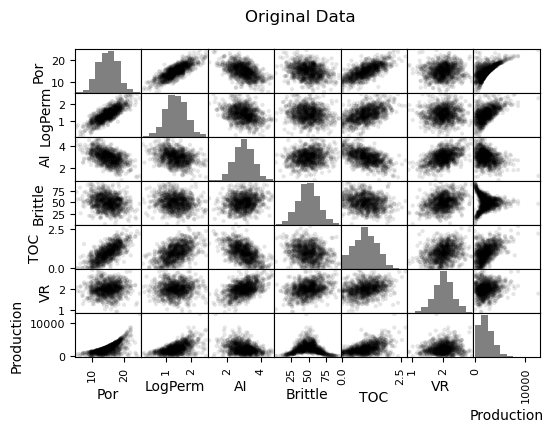

In [26]:
pd_plot.scatter_matrix(my_data_f7.drop('Prod2Scaled',axis=1), alpha = 0.1,      # pandas matrix scatter plot
figsize=(6, 4),color = 'black', hist_kwds={'color':['grey']})
features = ['Por','LogPerm','AI','Brittle','TOC','VR',"Production"]
x_f7 = my_data_f7.loc[:,features].values
plt.suptitle('Original Data')
x_f7 = StandardScaler().fit_transform(x_f7)

Now, we can see how the number of principle component scores affects the matrix scatter plot and the proportion of variance explained.

In [27]:
def pc_slider(PCs):
    pd_plot.scatter_matrix(df_dim[PCs-1], alpha = 0.1,                         # pandas matrix scatter plot
    figsize=(5, 5),color = 'black', hist_kwds={'color':['grey']})
    plt.suptitle(str(PCs)+' Principle Components')
    n_components = PCs
    pca_f7 = PCA(n_components=n_components)
    pca_f7.fit(x_f7)
    labels = 'Variance Explained', 'Variance Missing'
    sizes = []
    sizes.append(sum(np.round(pca_f7.explained_variance_ratio_,3)))
    sizes.append(1-sum(np.round(pca_f7.explained_variance_ratio_,3)))
    fig1, ax1 = plt.subplots(figsize=(3,3))
    
    n = ax1.pie(sizes, autopct='%1.2f%%',colors = ['red','blue'],shadow=True,startangle=90)
    #ax1.legend(sizes, labels=labels,loc='lower right')
    ax1.set_title('Variance for Arbitrary Feature Projection Components')
    n[0][0].set_alpha(0.5); n[0][1].set_alpha(0.5)
    
    ax1.axis('equal')                                                          # Equal aspect ratio ensures that pie is drawn as a circle.
x0 = widgets.Text(value='                                     Interactive PCA - Variance Explained, Arham Junaid and Dr. Michael Pyrcz, The University of Texas at Austin',layout=Layout(width='950px', height='30px'))
display(x0)
_=interact(pc_slider,PCs=(1,7), continuous_update=False)

Text(value='                                     Interactive PCA - Variance Explained, Arham Junaid and Dr. Mi…

interactive(children=(IntSlider(value=4, description='PCs', max=7, min=1), Output()), _dom_classes=('widget-in…

#### Comments
This is an interactive workflow displaying the key aspects of Principal Components. Appreciation to **Arham Junaid** for writing this code and providing this documentation as part of the SURI program at The University of Texas at Austin.
For more about in-depth workflows on PCA, check out INSERT LINK HERE the YouTube video associated with this interactive workflow.

If you want to learn more about data analytics and machine learning in Python, The Texas Center for Geostatistics has many other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, trend modeling and many other workflows available [here](https://github.com/GeostatsGuy/PythonNumericalDemos), along with a package for geostatistics in Python called [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy). 

We hope this was helpful.

*Arham and Michael*

#### More on Arham Junaid:
Arham is a world citizen who has resided in 5 countries and has spent time in various industries including Emergency Services, the Automotive industry and the Oil & Gas industry. He is currently pursuing a Mechanical Engineering degree and continues to seek experiences which combine his technical expertise with his leadership and business passion. Check out his LinkedIn below:
#### [LinkedIn](https://www.linkedin.com/in/arhamjunaid)

#### More on Michael Pyrcz and the Texas Center for Data Analytics and Geostatistics:

##### Michael Pyrcz, Associate Professor, University of Texas at Austin
 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*
    
With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development.
    
For more about Michael check out these links,
    
#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1),
    
   #### Want to Work Together?
   
   I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate,
    
   * Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you!
    
   * Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!
   
   * I can be reached at mpyrcz@austin.utexas.edu.
   
I'm always happy to discuss,
   
*Michael*
  
Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
    
#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
   